In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_row',None)

In [4]:
data = pd.read_csv('sbin.csv',index_col='Datetime',parse_dates=True)

In [5]:
idx = data.index.strftime('%H:%M')

In [6]:
data.index = idx

In [7]:
data

,Open,High,Low,Close,Adj Close,Volume
09:15,396.000000,397.600006,396.000000,396.500000,396.500000,0
09:16,396.549988,397.450012,396.450012,396.799988,396.799988,370303
09:17,396.549988,397.250000,396.399994,397.049988,397.049988,189943
09:18,397.100006,397.450012,396.750000,397.000000,397.000000,135919
09:19,397.100006,398.399994,397.049988,398.399994,398.399994,373584
09:20,398.450012,400.899994,398.200012,400.899994,400.899994,1013912
09:21,400.750000,401.049988,400.200012,400.649994,400.649994,420425
09:22,400.700012,400.799988,399.500000,399.750000,399.750000,341743
09:23,399.799988,400.850006,399.799988,399.899994,399.899994,307464
09:24,399.950012,400.399994,399.549988,400.250000,400.250000,263717


## MACD

In [8]:
def macd(data,ma_fast,ma_slow,signal):
    df = data.copy()
    df['ma_fast'] = df['Close'].ewm(span=ma_fast,min_periods=ma_fast,adjust=False).mean()
    df['ma_slow'] = df['Close'].ewm(span=ma_slow,min_periods=ma_slow,adjust=False).mean()
    df['macd'] = df['ma_fast'] - df['ma_slow']
    df['macd_signal'] = df['macd'].ewm(span=signal,min_periods=signal).mean()
    df['histogram'] = df['macd'] - df['macd_signal']
    return df

In [31]:
data = macd(data,12,26,30)

In [32]:
data

,Open,High,Low,Close,Adj Close,Volume,ma_fast,ma_slow,macd,macd_signal,histogram,signal,position,trade_price,trade_ret,cumm_trade
09:15,396.000000,397.600006,396.000000,396.500000,396.500000,0,NaN,NaN,NaN,NaN,NaN,,0,0.000000,0.000000,0.000000
09:16,396.549988,397.450012,396.450012,396.799988,396.799988,370303,NaN,NaN,NaN,NaN,NaN,,0,0.000000,0.000000,0.000000
09:17,396.549988,397.250000,396.399994,397.049988,397.049988,189943,NaN,NaN,NaN,NaN,NaN,,0,0.000000,0.000000,0.000000
09:18,397.100006,397.450012,396.750000,397.000000,397.000000,135919,NaN,NaN,NaN,NaN,NaN,,0,0.000000,0.000000,0.000000
09:19,397.100006,398.399994,397.049988,398.399994,398.399994,373584,NaN,NaN,NaN,NaN,NaN,,0,0.000000,0.000000,0.000000
09:20,398.450012,400.899994,398.200012,400.899994,400.899994,1013912,NaN,NaN,NaN,NaN,NaN,,0,0.000000,0.000000,0.000000
09:21,400.750000,401.049988,400.200012,400.649994,400.649994,420425,NaN,NaN,NaN,NaN,NaN,,0,0.000000,0.000000,0.000000
09:22,400.700012,400.799988,399.500000,399.750000,399.750000,341743,NaN,NaN,NaN,NaN,NaN,,0,0.000000,0.000000,0.000000
09:23,399.799988,400.850006,399.799988,399.899994,399.899994,307464,NaN,NaN,NaN,NaN,NaN,,0,0.000000,0.000000,0.000000
09:24,399.950012,400.399994,399.549988,400.250000,400.250000,263717,NaN,NaN,NaN,NaN,NaN,,0,0.000000,0.000000,0.000000


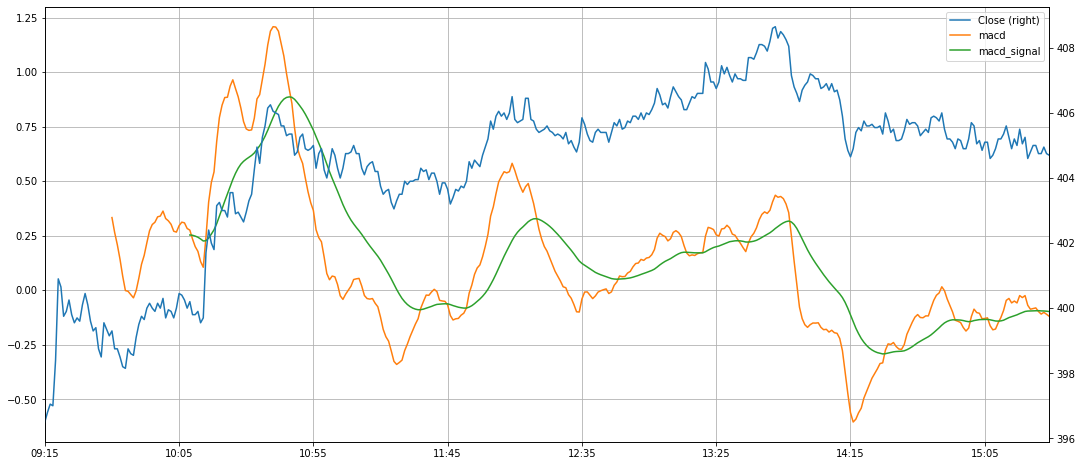

In [33]:
data[['Close','macd','macd_signal']].plot(secondary_y='Close',figsize=(18,8),grid=True)

In [48]:
data['signal'] = ""
data['position'] = 0
data['trade_price'] = 0
data['trade_ret'] = 0
data['long entry'] = np.nan
data['long exit'] = np.nan
data['short entry'] = np.nan
data['short exit'] = np.nan
data['lentry_macd'] = np.nan
data['lexit_macd'] = np.nan
data['sentry_macd'] = np.nan
data['sexit_macd'] = np.nan


for i in range(len(data.index)):
    #If there is an open position carry the position and the entry price
    if data['position'].iloc[i-1] != 0:
        print(i,str(data.index[i]),"Carry position")
        data['position'].iloc[i] = data['position'].iloc[i-1]
        data['trade_price'].iloc[i] = data['trade_price'].iloc[i-1]
       

    #entry long
    if data['position'].iloc[i] == 0:
        if data['macd'].iloc[i] > data['macd_signal'].iloc[i]:
            data['position'].iloc[i] = 1
            data['trade_price'].iloc[i] = data['Close'].iloc[i]
            data['signal'].iloc[i] = "Entry long"
            data['long entry'].iloc[i] = data['Close'].iloc[i]
            data['lentry_macd'].iloc[i] = data['macd'].iloc[i]
            print(i,str(data.index[i]),"Entry long Price",data['Close'].iloc[i])
    #check take profit and stop loss for long position
    if data['position'].iloc[i] == 1:
        if data.iloc[i]['macd'] < data.iloc[i]['macd_signal']:
            data['position'].iloc[i] = 0
            data['trade_ret'].iloc[i] = (data.iloc[i]['Close']-data.iloc[i]['trade_price'])
            data['trade_price'].iloc[i] = data.iloc[i]['Close']
            data['long exit'].iloc[i] = data['Close'].iloc[i]
            data['lexit_macd'].iloc[i] = data['macd'].iloc[i]
            data['signal'].iloc[i] = "Exit Long"
            print(i, str(data.index[i]),"Exit long",data.iloc[i]['Close'],"P&L =",data['trade_ret'].iloc[i])
    
    #entry short
    if data['position'].iloc[i] == 0:
        if data['macd'].iloc[i] < data['macd_signal'].iloc[i]:
            data['position'].iloc[i] = -1
            data['trade_price'].iloc[i] = data['Close'].iloc[i]
            data['signal'].iloc[i] = "Entry short"
            data['short entry'].iloc[i] = data['Close'].iloc[i]
            data['sentry_macd'].iloc[i] = data['macd'].iloc[i]
            print(i,str(data.index[i]),"Entry short price",data['Close'].iloc[i])

    #check take profit and stoploss for short position
    if data['position'].iloc[i] == -1:
        if data['macd'].iloc[i] > data['macd_signal'].iloc[i]:
            data['position'].iloc[i] = 0
            data['trade_ret'].iloc[i] = (data['trade_price'].iloc[i]-data['Close'].iloc[i])
            data['trade_price'].iloc[i] = data['Close'].iloc[i]
            data['short exit'].iloc[i] = data['Close'].iloc[i]
            data['sexit_macd'].iloc[i] = data['macd'].iloc[i]
            data['signal'].iloc[i] = "Exit short"
            print(i,str(data.index[i]),"Exit short",data['Close'].iloc[i],"P&L =",data['trade_ret'].iloc[i])
        

C:\Users\balaji\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


54 10:09 Entry long Price 400.20001220703125
55 10:10 Carry position
55 10:10 Exit long 399.7999877929688 P&L = -0.40002441406244316
55 10:10 Entry short price 399.7999877929688
56 10:11 Carry position
57 10:12 Carry position
58 10:13 Carry position
59 10:14 Carry position
60 10:15 Carry position
60 10:15 Exit short 401.70001220703125 P&L = -1.9000244140624432
61 10:16 Entry long Price 402.3999938964844
62 10:17 Carry position
63 10:18 Carry position
64 10:19 Carry position
65 10:20 Carry position
66 10:21 Carry position
67 10:22 Carry position
68 10:23 Carry position
69 10:24 Carry position
70 10:25 Carry position
71 10:26 Carry position
72 10:27 Carry position
73 10:28 Carry position
74 10:29 Carry position
75 10:30 Carry position
76 10:31 Carry position
77 10:32 Carry position
78 10:33 Carry position
79 10:34 Carry position
80 10:35 Carry position
81 10:36 Carry position
82 10:37 Carry position
83 10:38 Carry position
84 10:39 Carry position
85 10:40 Carry position
86 10:41 Carry po

334 14:49 Carry position
335 14:50 Carry position
336 14:51 Carry position
337 14:52 Carry position
338 14:53 Carry position
339 14:54 Carry position
339 14:54 Exit long 404.8999938964844 P&L = -0.850006103515625
339 14:54 Entry short price 404.8999938964844
340 14:55 Carry position
341 14:56 Carry position
342 14:57 Carry position
343 14:58 Carry position
344 14:59 Carry position
345 15:00 Carry position
345 15:00 Exit short 405.70001220703125 P&L = -0.800018310546875
346 15:01 Entry long Price 405.6000061035156
347 15:02 Carry position
348 15:03 Carry position
349 15:04 Carry position
350 15:05 Carry position
351 15:06 Carry position
352 15:07 Carry position
352 15:07 Exit long 404.6000061035156 P&L = -1.0
352 15:07 Entry short price 404.6000061035156
353 15:08 Carry position
354 15:09 Carry position
355 15:10 Carry position
356 15:11 Carry position
356 15:11 Exit short 405.20001220703125 P&L = -0.600006103515625
357 15:12 Entry long Price 405.3500061035156
358 15:13 Carry position
3

In [49]:
data['cumm_trade'] = data['trade_ret'].cumsum()
data['cumm_trade'][-1]

-1.9001159667967613

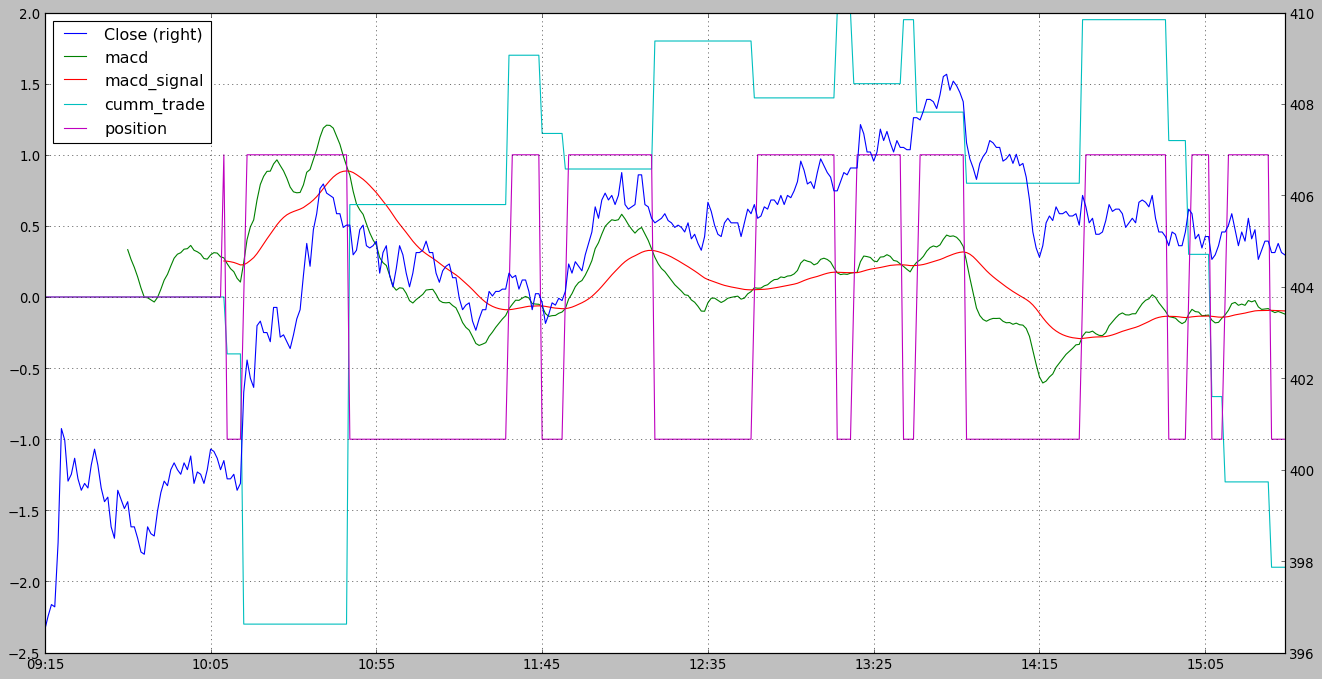

In [50]:
data[['Close','macd','macd_signal','cumm_trade','position']].plot(secondary_y='Close',figsize=(20,10),grid=True)

In [51]:
data

,Open,High,Low,Close,Adj Close,Volume,ma_fast,ma_slow,macd,macd_signal,...,buy signal,sell signal,long entry,long exit,short entry,short exit,lentry_macd,lexit_macd,sentry_macd,sexit_macd
09:15,396.000000,397.600006,396.000000,396.500000,396.500000,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:16,396.549988,397.450012,396.450012,396.799988,396.799988,370303,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:17,396.549988,397.250000,396.399994,397.049988,397.049988,189943,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:18,397.100006,397.450012,396.750000,397.000000,397.000000,135919,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:19,397.100006,398.399994,397.049988,398.399994,398.399994,373584,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:20,398.450012,400.899994,398.200012,400.899994,400.899994,1013912,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:21,400.750000,401.049988,400.200012,400.649994,400.649994,420425,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:22,400.700012,400.799988,399.500000,399.750000,399.750000,341743,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:23,399.799988,400.850006,399.799988,399.899994,399.899994,307464,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:24,399.950012,400.399994,399.549988,400.250000,400.250000,263717,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exit / Entry

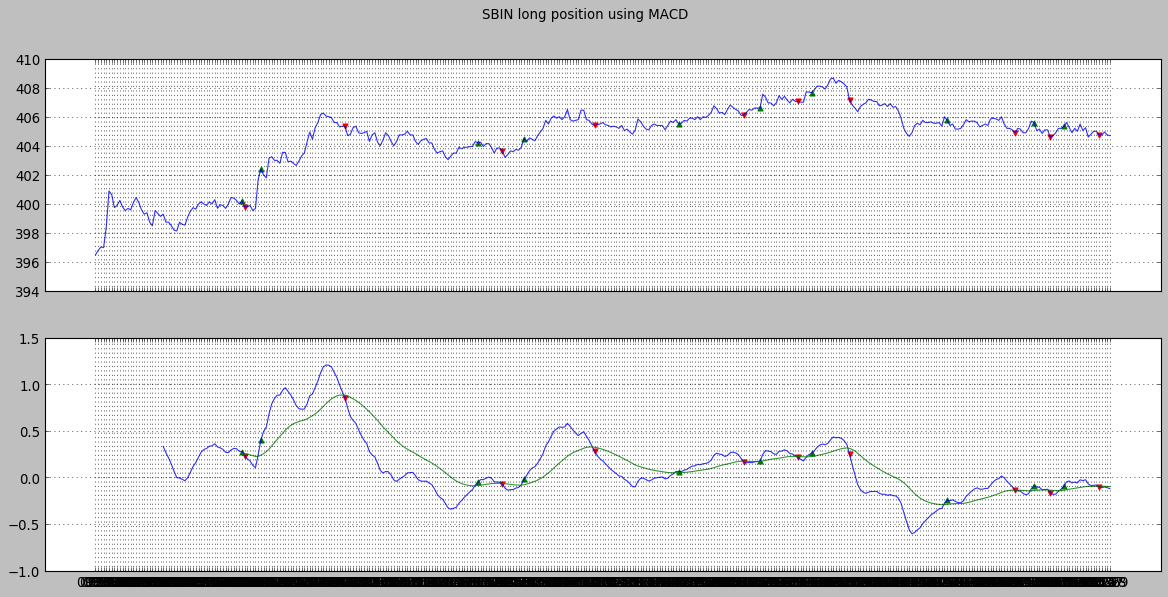

In [53]:
## chart the buy/sell signals:
plt.style.use('_classic_test')
fig,ax = plt.subplots(2,sharex=True,figsize=(18,8))
fig.suptitle('SBIN long position using MACD')

## chart the stock close and buy/sell signals:
ax[0].scatter(data.index,data['long entry'], color='green', marker='^',alpha=1)
ax[0].scatter(data.index,data['long exit'], color='red', marker='v', alpha=1)
ax[0].plot(data['Close'], alpha=0.8)
ax[0].grid()

## chart MACD and buy/sell signals:
ax[1].scatter(data.index,data['lentry_macd'], color='green', marker='^',alpha=1)
ax[1].scatter(data.index,data['lexit_macd'], color='red', marker='v', alpha=1)
ax[1].plot(data[['macd','macd_signal']],alpha=0.8)
ax[1].grid()

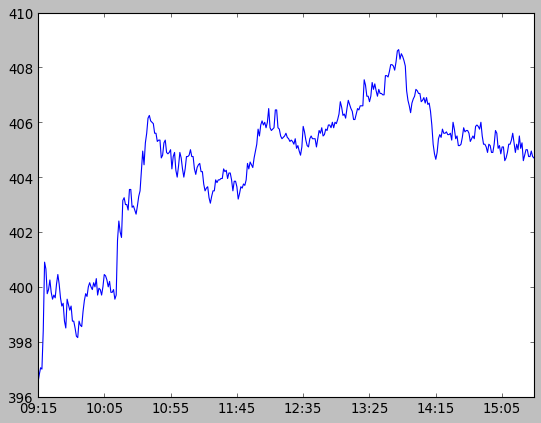

In [58]:
data['Close'].plot()